# 과제3

## 12171676 이종법 컴퓨터공학과



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import sys

import scipy.stats as stats # qqplot에 사용

In [2]:
#시각화 패키지들
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.style.use("ggplot")

In [3]:
X = pd.DataFrame( np.loadtxt('../data/T1-5.DAT', unpack = True).T,columns=['x1','x2','x3','x4','x5','x6','x7'] )
X.head()

,x1,x2,x3,x4,x5,x6,x7
0,8.0,98.0,7.0,2.0,12.0,8.0,2.0
1,7.0,107.0,4.0,3.0,9.0,5.0,3.0
2,7.0,103.0,4.0,3.0,5.0,6.0,3.0
3,10.0,88.0,5.0,2.0,8.0,15.0,4.0
4,6.0,91.0,4.0,2.0,8.0,10.0,3.0


# 문제 1

- T1-5 자료에서 PCA 수행

```
x1 : wind, x2 : solar, x3: CO, x4:NO, x5:NO2, X6:NO2, X7:HC

```

## 1-a.

x_bar 와 S를 구하고, 눈에 띄는 변수 설명 

In [4]:
x_bar = X.mean(axis=0)
x_s = X.cov()
print('표본 평균 :\n',x_bar)
print("표본 공분산 :\n",x_s)

표본 평균 :
 x1     7.500000
x2    73.857143
x3     4.547619
x4     2.190476
x5    10.047619
x6     9.404762
x7     3.095238
dtype: float64
표본 공분산 :
           x1          x2        x3        x4         x5         x6        x7
x1  2.500000   -2.780488 -0.378049 -0.463415  -0.585366  -2.231707  0.170732
x2 -2.780488  300.515679  3.909408 -1.386760   6.763066  30.790941  0.623693
x3 -0.378049    3.909408  1.522067  0.673635   2.314750   2.821719  0.141696
x4 -0.463415   -1.386760  0.673635  1.182346   1.088269  -0.810685  0.176539
x5 -0.585366    6.763066  2.314750  1.088269  11.363531   3.126597  1.044135
x6 -2.231707   30.790941  2.821719 -0.810685   3.126597  30.978513  0.594657
x7  0.170732    0.623693  0.141696  0.176539   1.044135   0.594657  0.478513


x2의 평균 및 분산이 매우 큰것을 관측 할 수 있다. 단위가 다른 것과 크게 다른것으로 생각된다.

그 다음으로는  X6,X5도 비교적 큰것을 확인할 수 있다.

## 1-b.

S를 이용하여 주성분 분석을하고, 전체 분산의 95% 이상을 설명하는 최소 주성분 갯수를 누적비율을 이용해 찾고 과정 설명.


2개의 주성분을 사용하여, 분산 설명 비율:  0.9540751366856778


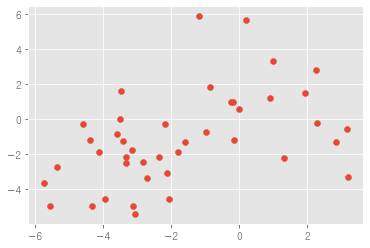

In [5]:
eig_vals,eig_vecs =np.linalg.eig(x_s)
print("2개의 주성분을 사용하여, 분산 설명 비율: ", np.sum(eig_vals[0:2])/np.sum(eig_vals))

PCA=X.dot(eig_vecs[0:2].T)

plt.scatter(PCA.iloc[:,0],PCA.iloc[:,1])
plt.show()

과정.
1. 표본 공분산에서, spectral decomposition 했을때, eigen vector들이 PC Direction이다.
2. eigen value의 누적비율을 통해 분산을 설명하는 비율을 찾을 수 있다. 여기서는 주성분 2개를 사용하면, 95%이상을 설명할 수 있다.
3. PC direction * X 가 주성분이 된다.


## 1-c.

표본상관행렬 R을 이용하여 주성분분석. 1,2번 주성분 설명. 


PC 1,2 Directions :
 [[ 0.23682109 -0.24146701  0.27844514 -0.64347435  0.22357922 -0.56053441
   0.17271949]
 [-0.20556654 -0.01126548 -0.52661387 -0.22446898  0.00570085  0.15613432
   0.7781366 ]]


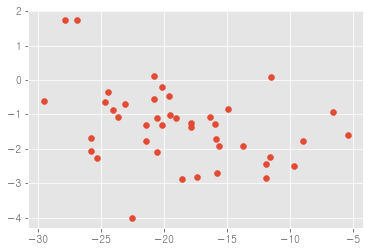

In [7]:
x_R = X.corr()
eig_vals,eig_vecs =np.linalg.eig(x_R)

print('PC 1,2 Directions :\n',eig_vecs[0:2])

PCA=X.dot(eig_vecs[0:2].T)
#print('PC 1,2 :\n',PCA)


plt.scatter(PCA.iloc[:,0],PCA.iloc[:,1])
plt.show()

First PC Y1 :
```
0.23682109 * X1 -0.24146701 * X2 + 0.27844514 * X3 -0.64347435 * X4 + 0.22357922 * X5 -0.56053441 * X6 + 0.17271949 * X7
```
Y1은  (X1+X3+X5+X7)과 (X2+X4+X6)의 차를 뜻한다. 


Second PC Y2 :
```
-0.20556654*X1 -0.01126548*X2 -0.52661387*X3 -0.22446898*X4 + 0.00570085*X5 + 0.15613432*X6 + 0.7781366*X7
```

Y2는 (X5+X6+X7)과 (X1,X2,X3,X4)의 차를 뜻한다.


## 1-d.

표본상관행렬 R을 이용하여 주성분분석. 첫 3개의 주성분으로 분산 비율 설명. S를 이용했을 때와 차이 설명




In [43]:
x_R = X.corr()
eig_vals,eig_vecs =np.linalg.eig(x_R)

print("3개의 주성분을 사용하여, 분산 설명 비율: ", np.sum(eig_vals[0:3])/7)


3개의 주성분을 사용하여, 분산 설명 비율:  0.5540974651908922


S를 이용해서 구했을때와 다르다. 이유는, R을 이용한 주성분분석은 표준화된 데이터에서 공분산을 이용해 분석하는것과 같기 때문이다.

# 문제 2.

- T4-6. 에서 PCA 수행

```
independence,support,benevolence,conformity,leadership,sex
```


1개 포함시 누적 비율 : 48.3801%
2개 포함시 누적 비율 : 50.0636%
3개 포함시 누적 비율 : 61.5718%
4개 포함시 누적 비율 : 77.8276%
5개 포함시 누적 비율 : 100.0000%


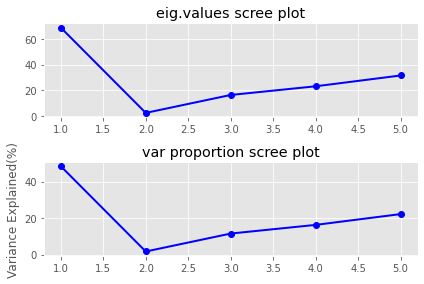

In [71]:
x_s = X.iloc[:,:5].cov()
eig_vals,eig_vecs =np.linalg.eig(x_s)

cur_var = []

for i in range(5):
    cur_var.append( np.sum(eig_vals[i:i+1])*100/np.sum(eig_vals) ) 
    print("{}개 포함시 누적 비율 : {:.4f}%".format(i+1,np.sum(eig_vals[0:i+1])*100/np.sum(eig_vals)))


    
plt.subplot(2,1,1)
plt.plot(np.arange(5)+1,eig_vals, 'o-', linewidth=2, color='blue',)
plt.title('eig.values scree plot')

plt.subplot(2,1,2)
plt.plot(np.arange(5)+1,cur_var, 'o-', linewidth=2, color='blue',)
plt.title('var proportion scree plot')
plt.ylabel('Variance Explained(%)')

plt.tight_layout()
plt.show()

## 2-b.

각 주성분을 해석

In [74]:
print('주성분 방향 : \n',eig_vecs.dot())

주성분 : 
 [[-0.57943538  0.38596285 -0.30939267  0.64287949  0.07917988]
 [ 0.04165689  0.58257769  0.51462195 -0.13991428  0.61192825]
 [ 0.52428496  0.35242491 -0.73403767 -0.11925544  0.21883511]
 [ 0.49309245  0.39833651  0.30427403  0.4221873  -0.5721565 ]
 [-0.38013742  0.47828926 -0.08970196 -0.61209965 -0.49398633]]


1번 PC Y1 :
```
-0.57943538  0.38596285 -0.30939267  0.64287949  0.07917988
```
Y1은  (x1,x3) (x2,x4,x5)간에 차이이며 x5는 거의 반영되지 않는다.

---
2번 PC Y2 :
```
 0.04165689  0.58257769  0.51462195 -0.13991428  0.61192825
```
Y2은  (x1,x2,x3,x5)과 (x4)의 차를 뜻한다. 

---
3번 PC Y3 :
```
0.52428496  0.35242491 -0.73403767 -0.11925544  0.21883511
```
Y3은  (X1+X2+X5)과 (X3+X4)의 차를 뜻한다. 

---

4번 PC Y4 :
```
 0.49309245  0.39833651  0.30427403  0.4221873  -0.5721565
```
Y4은  x5와 나머지의 차이를 뜻한다. 

---

5번 PC Y5 :
```
-0.38013742  0.47828926 -0.08970196 -0.61209965 -0.49398633
```
Y5은  X2와 나머지 차이를 뜻한다. 



## 2-c.

두개 주성분을 통한 분석.

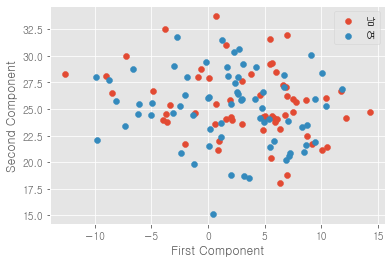

In [82]:
x_s = X.iloc[:,:5].cov()
eig_vals,eig_vecs =np.linalg.eig(x_s)

PCA=X.iloc[:,:5].dot(eig_vecs[0:2].T)


man= PCA[X['sex']==1] #남
woman = PCA[X['sex']==2] #여


plt.scatter(man.iloc[:,0],man.iloc[:,1],label='남')
plt.scatter(woman.iloc[:,0],woman.iloc[:,1],label='여')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()


- First component, Second Component 모두 최솟값인 점이 하나있다. outlier로 보인다. 
- 남,여 간에 대부분 차이는 없지만. Second component에서 최대값 주변에는 남자가 많고 최소값 주변에는 여자들이 많이 관측된다. 유의한 차이는 아니다.

### 문제 3.

600x600 grayscale 이미지 100개에서 , 12x12 patch를 추출.

총 100(600-11)^2 patch중 10^5 랜덤 복원 추출하여 x_bar와 S를 추출해서 주성분 분석하라.



In [10]:
import cv2

In [11]:
images=np.zeros([100,600,600])

for i in range(1,101):
    images[i-1,:,:]=cv2.imread('../data/img/img{}'.format(i),cv2.IMREAD_GRAYSCALE)


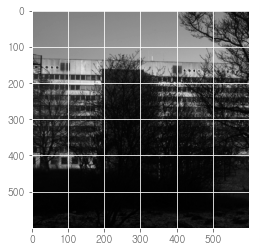

In [12]:
plt.imshow(images[0],'gray')

In [13]:
n=100000
r1=np.random.choice(100, n)#이미지
r2=np.random.choice(589,n)#x축 시작점
r3=np.random.choice(589,n)#y축 시작점


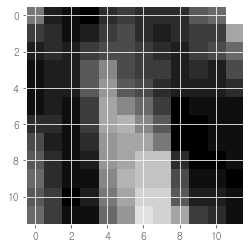

In [14]:
plt.imshow(images[r1[1],r2[1]:r2[1]+12,r3[1]:r3[1]+12],'gray')

In [15]:
#패치 추출
patches=np.zeros([n,144])
for i in range(n):
    patches[i,:]=images[r1[i],r2[i]:r2[i]+12,r3[i]:r3[i]+12].reshape(144)

In [16]:
x_bar=patches.mean()
x_cov=np.cov(patches.T)
_,U = np.linalg.eig(x_cov)

## 3.a

d=20 개 주성분을 이용해서, 첫번째 image를 복원하라.

In [17]:
Z=np.zeros([600,600])

for i in 12*np.arange(0,49)+1 :
    for j in 12*np.arange(0,49)+1 :
        Z[i:(i+12),j:(j+12)] = (x_bar + U[:,0:20]@U[:,0:20].T@((images[0,i:(i+12),j:(j+12)].reshape(144))-x_bar)).reshape(12,12)


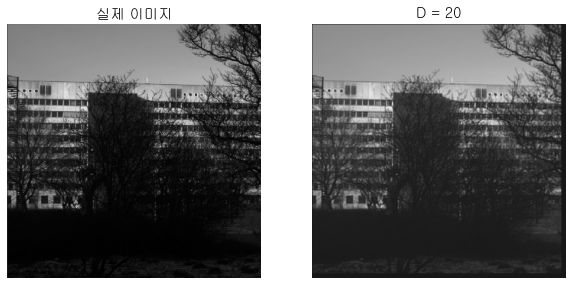

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(images[0],'gray')
plt.title('실제 이미지')

plt.subplot(1,2,2)
plt.axis('off')
plt.title('D = 20')
plt.imshow(Z,'gray')

d =20 일때는 거의 유사하다.

## 3.b

d=1,3,5,10,144 개 주성분을 이용해서, 첫번째 image를 복원하라.

In [19]:
Z=np.zeros([5,600,600])


for index,k in enumerate([1,3,5,10,144]):
    for i in 12*np.arange(0,49)+1 :
        for j in 12*np.arange(0,49)+1 :
            Z[index,i:(i+12),j:(j+12)] = (x_bar + U[:,0:k]@U[:,0:k].T@((images[0,i:(i+12),j:(j+12)].reshape(144))-x_bar)).reshape(12,12)


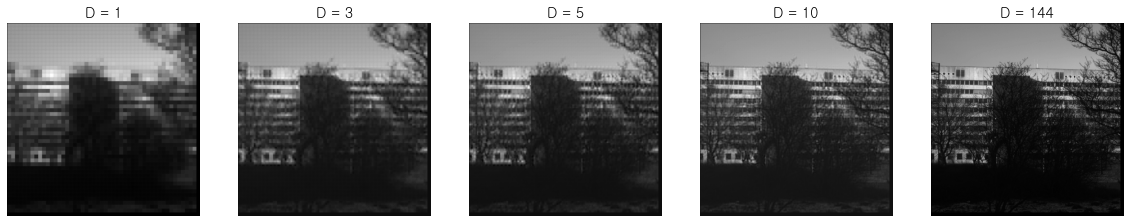

In [20]:
plt.figure(figsize=(20,20))


for index,k in enumerate([1,3,5,10,144]):
    plt.subplot(1,5,index+1)
    plt.axis('off')
    plt.imshow(Z[index],'gray')
    plt.title("D = {}".format(k))
plt.show()

많아질수록 선명해짐을 볼 수 있다.

# 문제 4.

요인분석

In [159]:
rho=np.array([[1,0.63,0.45],
              [0.63,1,0.35],
              [0.45,0.35,1]])
rho

array([[1.  , 0.63, 0.45],
       [0.63, 1.  , 0.35],
       [0.45, 0.35, 1.  ]])

## 4-a.

rho = LL_t + psi 로 표현

In [160]:
L=np.array([[0.9,0.7,0.5]]).T
psi=np.array([[0.19,0,0],
              [0,0.51,0],
              [0,0,0.75]])
(L @ L.T) +psi

array([[1.  , 0.63, 0.45],
       [0.63, 1.  , 0.35],
       [0.45, 0.35, 1.  ]])

## 4-b.

i=1,2,3 communality와 Corr(Zi,F1)=l_i1

Z와 F의 cov( corr )은 loading martrix이다.


In [111]:
for i in range(3):
    communality =L[i,0]**2
    print("{}번 communality : {} / Corr(Z_{},F1) : {}".format(i+1,communality,i+1,L[i,0]))

1번 communality : 0.81 / Corr(Z_1,F1) : 0.9
2번 communality : 0.48999999999999994 / Corr(Z_2,F1) : 0.7
3번 communality : 0.25 / Corr(Z_3,F1) : 0.5


communality는 Factor에 의해 해당 변수의 분산이 설명되는 정도를 말한다.

로딩이 1,2,3 모두 값이 차이가 난다. Factor는 1번 변수에 가장 크게 관여된다.

## 4-c.

주성분 방법으로 추정.

m=1이기에, First principal component에서 loading matrix을 구할 수 있다.


In [148]:
eig_vals,eig_vecs =np.linalg.eig(rho)
load=np.array([eig_vecs[:,0]*np.sqrt(eig_vals[0])]).T
print("loading matrix : \n",load)
print("psi : \n",rho-load.dot(load.T))

loading matrix : 
 [[0.87573628]
 [0.8311066 ]
 [0.71107723]]
psi : 
 [[ 0.23308596 -0.0978302  -0.17271613]
 [-0.0978302   0.30926183 -0.24098098]
 [-0.17271613 -0.24098098  0.49436917]]


a와 비교하여 결과가 가정과 많이 다르다.

이것은 하나의 주성분으로 모든 분산을 설명할 수 없기 때문이다.

loading값의 대소비교는 같다.



## 4-d.

분산 비율 설명


In [158]:
print("1개의 주성분을 사용하여, 분산 설명 비율: ", np.sum(eig_vals[0:1])/np.sum(eig_vals))

1개의 주성분을 사용하여, 분산 설명 비율:  0.6544276800881917


## 4-e.

a 에서 reduced correlation matrix를 계산하고, 주성분 방법으로 loading 계산


In [162]:
rho_reduce=rho-psi

eig_vals,eig_vecs =np.linalg.eig(rho_reduce)
load=np.array([eig_vecs[:,0]*np.sqrt(eig_vals[0])]).T
print("loading matrix : \n",load)
print("psi : \n",rho-load.dot(load.T))

loading matrix : 
 [[0.9]
 [0.7]
 [0.5]]
psi : 
 [[ 1.90000000e-01  0.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  5.10000000e-01  5.55111512e-17]
 [-5.55111512e-17  5.55111512e-17  7.50000000e-01]]


이제 a의 결과와 매우 유사해졌다.

loading  matrix의 값은 같아졌다.